In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
data_path = 'spambase.data'
columns = [f'feature_{i}' for i in range(1, 58)] + ['label'] 
data = pd.read_csv(data_path, header=None, names=columns)

In [16]:
data.head

<bound method NDFrame.head of       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          0.00       0.64       0.64        0.0       0.32       0.00   
1          0.21       0.28       0.50        0.0       0.14       0.28   
2          0.06       0.00       0.71        0.0       1.23       0.19   
3          0.00       0.00       0.00        0.0       0.63       0.00   
4          0.00       0.00       0.00        0.0       0.63       0.00   
...         ...        ...        ...        ...        ...        ...   
4596       0.31       0.00       0.62        0.0       0.00       0.31   
4597       0.00       0.00       0.00        0.0       0.00       0.00   
4598       0.30       0.00       0.30        0.0       0.00       0.00   
4599       0.96       0.00       0.00        0.0       0.32       0.00   
4600       0.00       0.00       0.65        0.0       0.00       0.00   

      feature_7  feature_8  feature_9  feature_10  ...  feature_49  \
0          

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    return cm, accuracy, precision, recall, specificity, f1, fpr, tpr, roc_auc

In [5]:
models = {
    "Without L2 Regularization": LogisticRegression(penalty=None, max_iter=10000, solver="lbfgs"),
    "With L2 Regularization": LogisticRegression(penalty="l2", C=1.0, max_iter=10000, solver="lbfgs"),
}
results = {}
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

for name, metrics in results.items():
    cm, accuracy, precision, recall, specificity, f1, fpr, tpr, roc_auc = metrics
    print(f"\n{name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {roc_auc:.2f}")

Training model: Without L2 Regularization
Training model: With L2 Regularization

Without L2 Regularization
Confusion Matrix:
[[763  41]
 [ 64 513]]
Accuracy: 0.92
Precision: 0.93
Recall: 0.89
Specificity: 0.95
F1 Score: 0.91
AUC: 0.97

With L2 Regularization
Confusion Matrix:
[[771  33]
 [ 60 517]]
Accuracy: 0.93
Precision: 0.94
Recall: 0.90
Specificity: 0.96
F1 Score: 0.92
AUC: 0.97


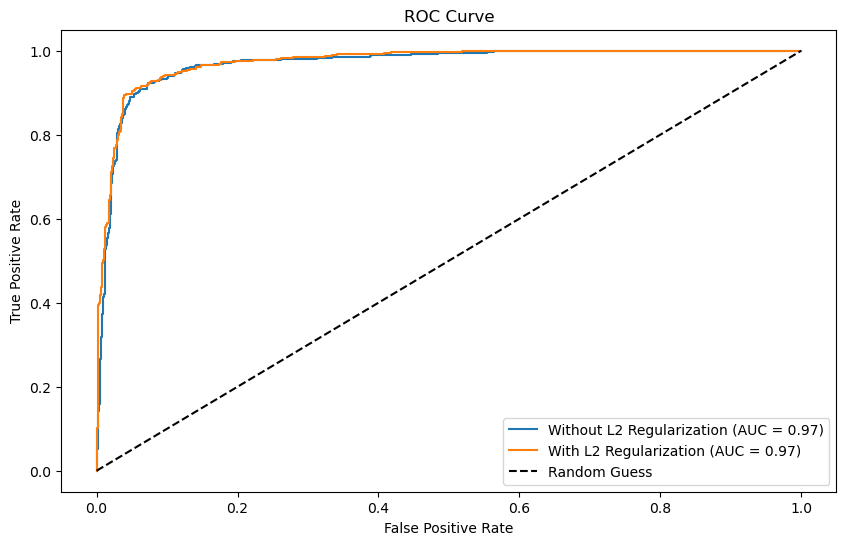

In [6]:
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    fpr, tpr, roc_auc = metrics[6], metrics[7], metrics[8]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [14]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)